In [1]:
using Pkg,Plots
Pkg.activate("..")
using Clapeyron

  Activating environment at `C:\Users\Pierre J Walker\OneDrive - Imperial College London\Documents\OpenSAFT\Project.toml`


In [20]:
function Pxy_plot(model,T;x_max=1. -1e-10)
    plt=[]
    for j in 1:length(T)
        x = range(5e-3,x_max[j],length=100)
        X = Clapeyron.FractionVector.(x)
        P = []
        y = []
        v_l = 0
        v_v = 0
    for i in 1:100
        if i==1
            sat = bubble_pressure(model,T[j],X[1])
            append!(P,sat[1])
            append!(y,sat[4][1])
            v_l = sat[2]
            v_v = sat[3]
        else
            try
                sat = bubble_pressure(model,T[j],X[i];v0 = [log10(v_l),log10(v_v),y[i-1],1-y[i-1]])
            catch
                sat = bubble_pressure(model,T[j],X[i])
            end
            append!(P,sat[1])
            append!(y,sat[4][1])
            v_l = sat[2]
            v_v = sat[3]
        end
    end
        if j==1
            plt = plot(x,P ./1e6,label="Bubble",legend=:topleft,color=:red,xlabel=string("x(",mix.components[1],"),y(",mix.components[1],")"),ylabel="P / MPa",yaxis=:log)
            plt = plot!(y,P ./1e6,label="Dew",color=:blue)
        else
            plt = plot!(x,P ./1e6,label="",legend=:topleft,color=:red)
            plt = plot!(y,P ./1e6,label="",color=:blue)
        end
    end
    display(plt)
end

Pxy_plot (generic function with 1 method)

In this notebook we will try to replicate various figures from Huang and Radosz's 1991 paper

## Figure 7

┌ Error: initial temperature 462 greater than critical temperature 192.173051244988. returning NaN
└ @ Clapeyron C:\Users\Pierre J Walker\OneDrive - Imperial College London\Documents\OpenSAFT\src\methods\property_solvers\singlecomponent.jl:49


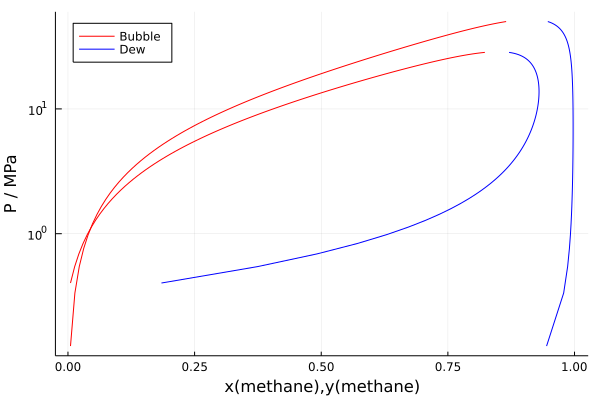

┌ Error: initial temperature 462 greater than critical temperature 192.173051244988. returning NaN
└ @ Clapeyron C:\Users\Pierre J Walker\OneDrive - Imperial College London\Documents\OpenSAFT\src\methods\property_solvers\singlecomponent.jl:49
┌ Error: initial temperature 623 greater than critical temperature 192.173051244988. returning NaN
└ @ Clapeyron C:\Users\Pierre J Walker\OneDrive - Imperial College London\Documents\OpenSAFT\src\methods\property_solvers\singlecomponent.jl:49


In [29]:
# Initiate system
propanol2 = CKSAFT(["2-propanol"])
mix = CKSAFT(["methane","hexadecane"])
Pxy_plot(mix,[462,623];x_max=[0.865,0.823]);

In [4]:
bubble_pressure(mix,394,[0.2,0.8])

┌ Error: initial temperature 394 greater than critical temperature 320.71255422289795. returning NaN
└ @ Clapeyron C:\Users\Pierre J Walker\OneDrive - Imperial College London\Documents\OpenSAFT\src\methods\property_solvers\singlecomponent.jl:49


(4.997149374317168e6, 8.437823948207208e-5, 0.0005731478443386795, [0.8967238788144359, 0.10327612118556406])

In [3]:
# Obtain saturation pressure of less volatile component
T = [298,394]
A = get_sat_pure.(propanol2, T)
P_sat = [A[i][1] for i in 1:length(T)];

In [4]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,0.815,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 394, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat[2]);

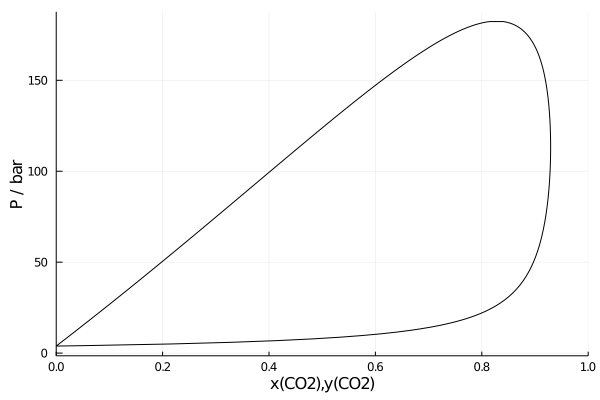

In [5]:
# Plotting
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1))


plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(CO2),y(CO2)",ylabel="P / bar",xlim=(0,1))
# plt = plot!(z_2,P_sat_mix_2/1e5,color=:black,label="",xlabel="x(methane),y(methane)",ylabel="P / bar")
display(plt)